# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


# Data 

## Read the data

In [84]:
df_store=pd.read_csv(r'stores.csv')
df_feature=pd.read_csv(r'features.csv')
df_train=pd.read_csv(r'train.csv')
df_test=pd.read_csv(r'test.csv')

## Merge Data 

In [86]:
df_merged=pd.merge(df_store,df_train,how='outer')

In [89]:
df=pd.merge(df_merged,df_feature,how='outer')

In [90]:
df = pd.merge(df,df_test, how='left')

# EDA:

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     423325 non-null  bool   
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
dtypes: bool(1), float64(12), int64(1), object(2)
memory usage: 48.8+ MB


In [96]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
dtype: int64

In [98]:
df.describe()

,Store,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,423325.000000,421570.000000,421570.000000,421570.000000,423325.000000,423325.000000,152433.000000,112532.000000,138658.000000,136466.000000,153187.000000,422740.000000,422740.000000
mean,22.203860,136727.915739,44.260317,15981.258123,60.067140,3.361933,7246.604247,3337.597289,1449.098932,3382.019834,4618.743783,171.218863,7.957296
std,12.786244,60980.583328,30.492054,22711.183519,18.452599,0.458038,8319.906707,9461.265420,9674.705234,6306.728468,6258.233496,39.167088,1.863433
min,1.000000,34875.000000,1.000000,-4988.940000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,11.000000,93638.000000,18.000000,2079.650000,46.670000,2.935000,2230.800000,42.000000,5.140000,500.910000,1863.720000,132.022667,6.891000
50%,22.000000,140167.000000,37.000000,7612.030000,62.070000,3.452000,5336.520000,194.670000,24.830000,1465.540000,3340.020000,182.350989,7.866000
75%,33.000000,202505.000000,74.000000,20205.852500,74.260000,3.738000,9210.900000,1943.200000,104.500000,3592.000000,5535.130000,212.512605,8.567000
max,45.000000,219622.000000,99.000000,693099.360000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [99]:
len(df)

423325

In [102]:
df.shape

(423325, 16)

In [104]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [106]:
df.duplicated().sum()

0

In [107]:
## convert Date from Object to Date

In [110]:
df['Date']=pd.to_datetime(df['Date'])

In [112]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day']=df['Date'].dt.day

In [114]:
df.dtypes

Store                    int64
Type                    object
Size                   float64
Dept                   float64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Week                    UInt32
Day                      int32
dtype: object

## Data Visualization

### Visuals of Sales

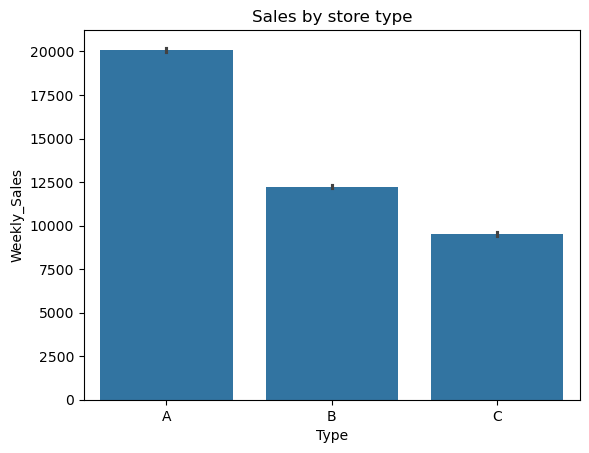

In [118]:
sns.barplot(x='Type',y='Weekly_Sales',data=df)
plt.title('Sales by store type')
plt.show()

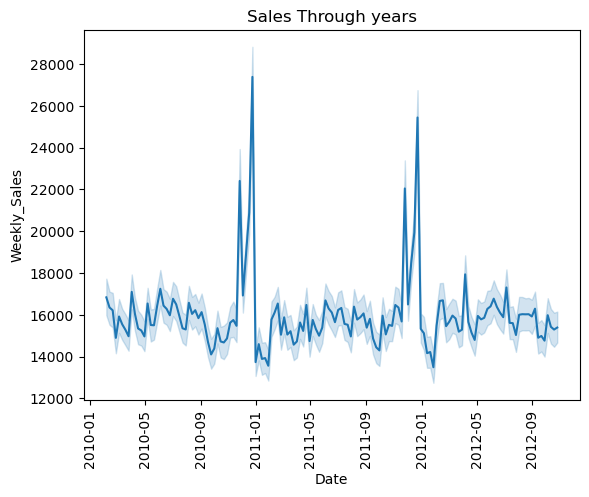

In [119]:
sns.lineplot(x='Date',y='Weekly_Sales',data=df)
plt.title('Sales Through years')
plt.xticks(rotation=90)
plt.show()

In [120]:
data_store=df.groupby('Store')['Weekly_Sales'].sum().reset_index()
data_store_sorted=data_store.sort_values(by='Weekly_Sales',ascending=False)

In [121]:
top_store=data_store_sorted.head(5)
bottom_store=data_store_sorted.tail(5)
order1=top_store.sort_values('Weekly_Sales', ascending=False)['Store']
order2=bottom_store.sort_values('Weekly_Sales', ascending=True)['Store']

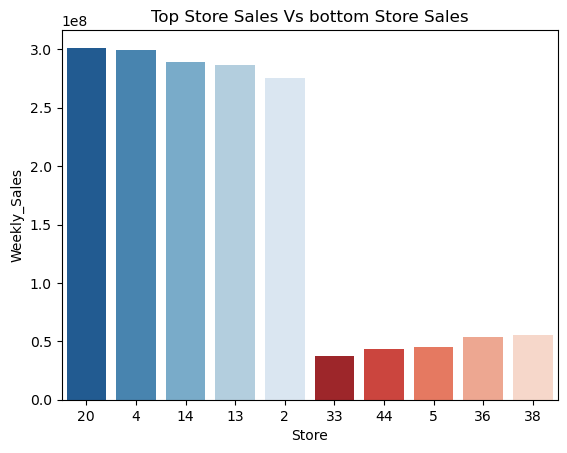

In [122]:
sns.barplot(data=top_store,x='Store',y='Weekly_Sales', palette="Blues_r",order=order1)
sns.barplot(data=bottom_store,x='Store',y='Weekly_Sales', palette="Reds_r",order=order2)

plt.title("Top Store Sales Vs bottom Store Sales")
plt.show()

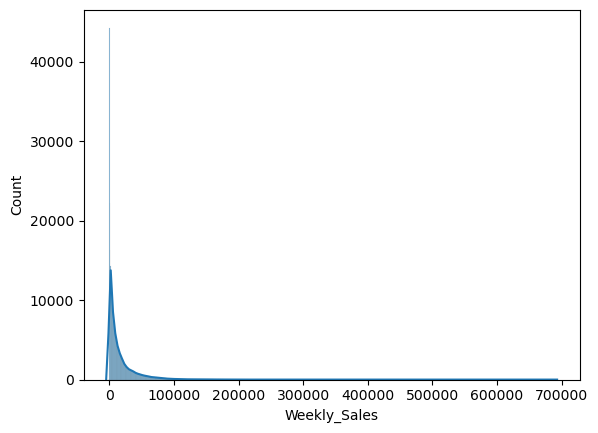

In [123]:
sns.histplot(df.Weekly_Sales,kde=True)
plt.show()

### Features visuals

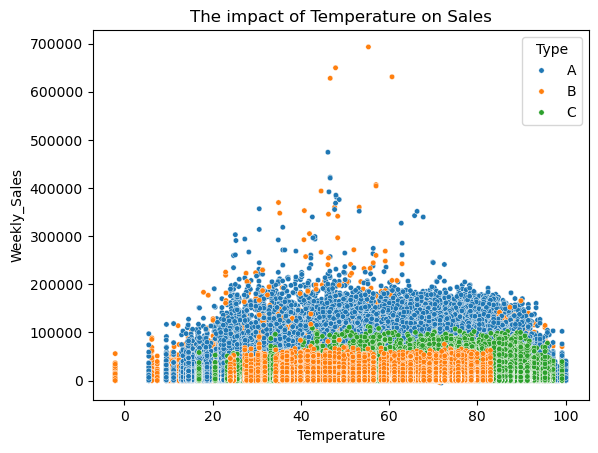

In [125]:
sns.scatterplot(x='Temperature',y='Weekly_Sales',data=df,hue='Type',s=15)
plt.title('The impact of Temperature on Sales')
plt.show()

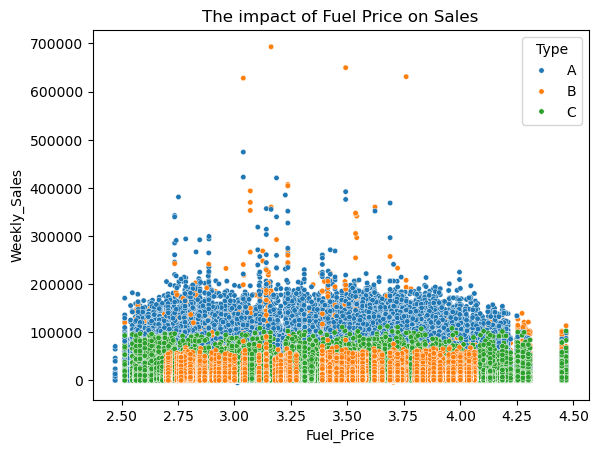

In [126]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales',data=df,hue='Type',s=15)
plt.title('The impact of Fuel Price on Sales')
plt.show()

In [127]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year', 'Month',
       'Week', 'Day'],
      dtype='object')

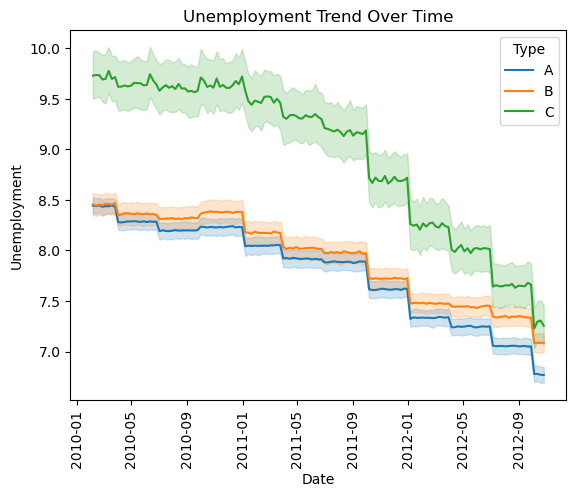

In [128]:
sns.lineplot(x='Date',y='Unemployment',data=df,hue='Type')
plt.title('Unemployment Trend Over Time')
plt.xticks(rotation=90)
plt.show()

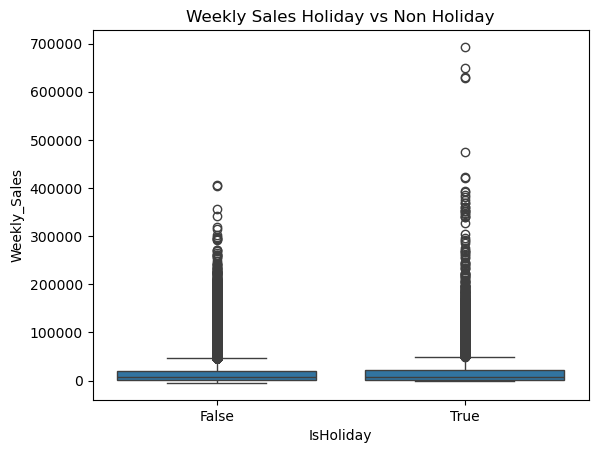

In [129]:
sns.boxplot(data=df,x='IsHoliday',y='Weekly_Sales')
plt.title('Weekly Sales Holiday vs Non Holiday')
plt.show()

# Data Prepeocessing :

## Handling Missing Values 

In [132]:
df.isna().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [151]:
df.Type.fillna(df.Type.mode()[0],inplace=True)

df.Size.fillna(df.Size.mode()[0],inplace=True)

df.Dept.fillna(df.Dept.mode()[0],inplace=True)

df.CPI.fillna(df.CPI.mean(),inplace=True)

df.Unemployment.fillna(df.Unemployment.mean(),inplace=True)

df.Weekly_Sales.fillna(df.Weekly_Sales.mean(),inplace=True)

df.MarkDown1.fillna(0,inplace=True)
# ممكن نغيرها ع حسب المودل
df.MarkDown2.fillna(0,inplace=True)

df.MarkDown3.fillna(0,inplace=True)

df.MarkDown4.fillna(0,inplace=True)

df.MarkDown5.fillna(0,inplace=True)

In [153]:
df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Week            0
Day             0
dtype: int64

In [156]:
df.to_csv('full_data.csv')

## Check and Handle Outliers :

## Encoding :

## Scaling :

## Data Splittng